In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from var_model.plot_utils import coeff_matrix_no_mask, coeff_matrix_mask, plot_coeff_heatmaps, plot_adj_matrix, plot_corr_mat,calculate_error_table,plot_ts
from var_model.utils import read_pickle
from var_model.model_train import order_cols
import pickle 
sns.set()
from collections import defaultdict

In [80]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Load Models

airquality

In [81]:
var_air_mask  = read_pickle("../data/05_model_output/airquality_var_mask.pkl")
var_air_mask_std = read_pickle("../data/05_model_output/airquality_var_mask_std.pkl")
var_air_mask_minmax = read_pickle("../data/05_model_output/airquality_var_mask_minmax.pkl")
var_air_no_mask = read_pickle("../data/05_model_output/airquality_var_no_mask.pkl")
var_air_no_mask_std = read_pickle("../data/05_model_output/airquality_var_no_mask_std.pkl")
var_air_no_mask_minmax = read_pickle("../data/05_model_output/airquality_var_no_mask_minmax.pkl")


prsa

In [82]:
var_prsa_mask = read_pickle("../data/05_model_output/prsa_var_mask.pkl")
var_prsa_mask_std = read_pickle("../data/05_model_output/prsa_var_mask_std.pkl")
var_prsa_mask_minmax = read_pickle("../data/05_model_output/prsa_var_mask_minmax.pkl")
var_prsa_no_mask = read_pickle("../data/05_model_output/prsa_var_no_mask.pkl")
var_prsa_no_mask_std = read_pickle("../data/05_model_output/prsa_var_no_mask_std.pkl")
var_prsa_no_mask_minmax = read_pickle("../data/05_model_output/prsa_var_no_mask_minmax.pkl")

## Load Masks

airquality

In [83]:
air_mask = read_pickle("../data/05_model_output/airquality_mask.pkl")
air_mask_std = read_pickle("../data/05_model_output/airquality_mask_std.pkl")
air_mask_minmax = read_pickle("../data/05_model_output/airquality_mask_minmax.pkl")

prsa

In [84]:
prsa_mask = read_pickle("../data/05_model_output/prsa_mask.pkl")
prsa_mask_std = read_pickle("../data/05_model_output/prsa_mask_std.pkl")
prsa_mask_minmax = read_pickle("../data/05_model_output/prsa_mask_minmax.pkl")

## Load Var lists

airquality

In [85]:
air_var_list = read_pickle("../data/04_model_bn_output/airquality_var_list.pkl")
air_var_list_std = read_pickle("../data/04_model_bn_output/airquality_var_list_std.pkl")
air_var_list_minmax = read_pickle("../data/04_model_bn_output/airquality_var_list_minmax.pkl")

prsa

In [86]:
prsa_var_list = read_pickle("../data/04_model_bn_output/prsa_var_list.pkl")
prsa_var_list_std = read_pickle("../data/04_model_bn_output/prsa_var_list_std.pkl")
prsa_var_list_minmax =  read_pickle("../data/04_model_bn_output/prsa_var_list_minmax.pkl")

## Model Coefficients

airquality

In [87]:
var_air_mask_coeff = coeff_matrix_mask(var_air_mask,air_mask)
var_air_mask_std_coeff = coeff_matrix_mask(var_air_mask_std,air_mask_std)
var_air_mask_minmax_coeff = coeff_matrix_mask(var_air_mask_minmax,air_mask_minmax)
var_air_no_mask_coeff = coeff_matrix_no_mask(var_air_no_mask)
var_air_no_mask_std_coeff = coeff_matrix_no_mask(var_air_no_mask_std)
var_air_no_mask_minmax_coeff = coeff_matrix_no_mask(var_air_no_mask_minmax)

prsa

In [88]:
var_prsa_mask_coeff = coeff_matrix_mask(var_prsa_mask,prsa_mask)
var_prsa_mask_std_coeff = coeff_matrix_mask(var_prsa_mask_std,prsa_mask_std)
var_prsa_mask_minmax_coeff = coeff_matrix_mask(var_prsa_mask_minmax,prsa_mask_minmax)
var_prsa_no_mask_coeff = coeff_matrix_no_mask(var_prsa_no_mask)
var_prsa_no_mask_std_coeff = coeff_matrix_no_mask(var_prsa_no_mask_std)
var_prsa_no_mask_minmax_coeff = coeff_matrix_no_mask(var_prsa_no_mask_minmax)

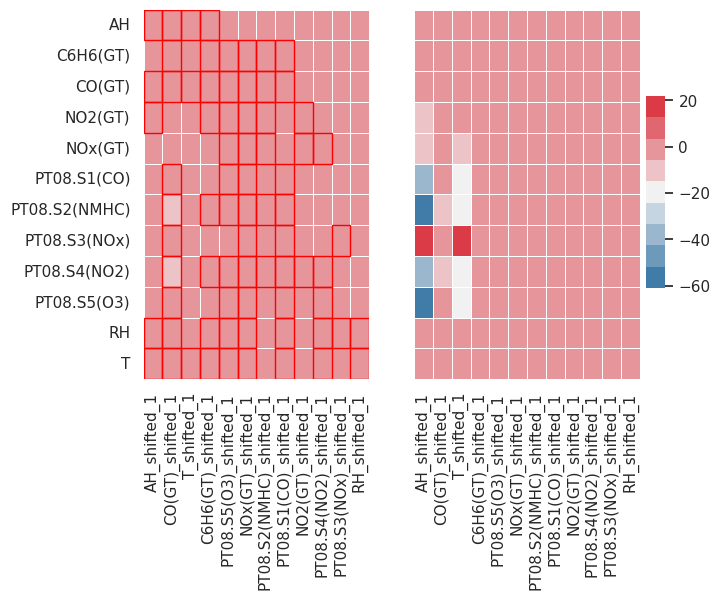

In [89]:
plot_coeff_heatmaps([var_air_mask_coeff, var_air_no_mask_coeff], air_var_list, air_mask,index = 0)


## Plot Adjacency Matrix of BN

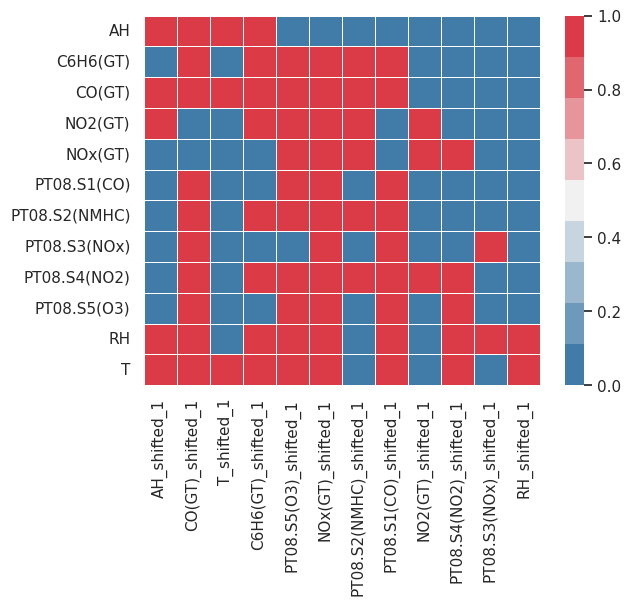

In [90]:
plot_adj_matrix(air_mask, air_var_list)

## Correlation Matrix of data train

### load data

In [91]:
df_air_train  = pd.read_csv("../data/03_model_input/air_quality_train.csv")
df_air_test  = pd.read_csv("../data/03_model_input/air_quality_test.csv")
df_prsa_train = pd.read_csv("../data/03_model_input/prsa_train.csv")
df_prsa_test = pd.read_csv("../data/03_model_input/prsa_test.csv")

In [92]:
df_air_train = order_cols(df_air_train,air_var_list)
df_prsa_train = order_cols(df_prsa_train,prsa_var_list)

In [93]:
def standardize(df:pd.DataFrame, var_list:list):
    scaler = StandardScaler()
    df_std = pd.DataFrame(scaler.fit_transform(df.to_numpy() ), columns = df.columns)
    df_std = order_cols(df_std, var_list)

    return df_std


In [94]:
def minmaxize(df:pd.DataFrame, var_list:list):
    scaler = MinMaxScaler()
    df_minmax = pd.DataFrame(scaler.fit_transform(df.to_numpy() ), columns = df.columns)
    df_minmax = order_cols(df_minmax, var_list)

    return df_minmax

normalize airquality

In [95]:
df_air_train_std = standardize(df_air_train,air_var_list)
df_air_train_minmax = minmaxize(df_air_train,air_var_list)

normalize prsa

In [96]:
df_prsa_train_std = standardize(df_prsa_train,prsa_var_list)
df_prsa_train_minmax = minmaxize(df_prsa_train,prsa_var_list)

### Plot CorrMat

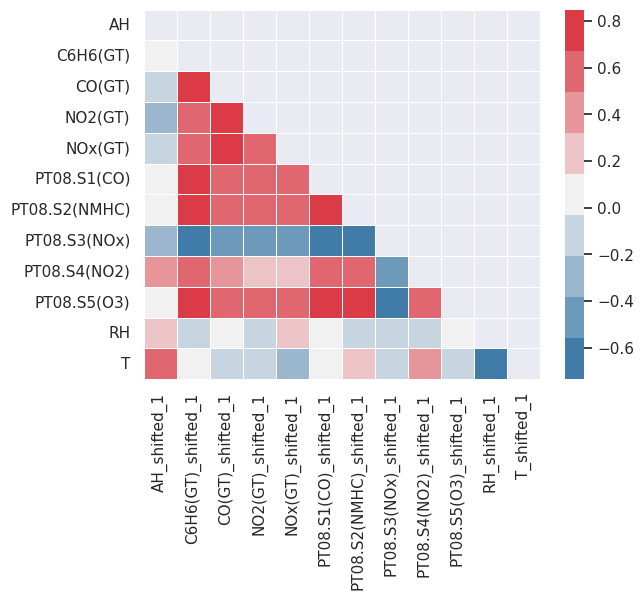

In [97]:
plot_corr_mat(df_air_train)

In [98]:
from var_model.gobnilp_utils import shift_cols

In [99]:
df_shifted = shift_cols(df_air_train)

In [100]:
num_cols = len(df_air_train.columns)

In [101]:
df_shifted.corr().iloc[:num_cols, num_cols:]

,AH_shifted_1,C6H6(GT)_shifted_1,CO(GT)_shifted_1,NO2(GT)_shifted_1,NOx(GT)_shifted_1,PT08.S1(CO)_shifted_1,PT08.S2(NMHC)_shifted_1,PT08.S3(NOx)_shifted_1,PT08.S4(NO2)_shifted_1,PT08.S5(O3)_shifted_1,RH_shifted_1,T_shifted_1
AH,0.990194,0.080541,-0.020361,-0.220954,-0.102919,0.075555,0.090653,-0.284629,0.486366,0.008350,0.149931,0.553734
C6H6(GT),0.052655,0.846862,0.632490,0.554521,0.565993,0.770933,0.845228,-0.662600,0.657218,0.742827,-0.056958,0.102677
CO(GT),-0.036059,0.686079,0.874502,0.699574,0.725425,0.692755,0.682095,-0.560297,0.466853,0.655918,0.073145,-0.073463
NO2(GT),-0.238769,0.611551,0.718426,0.909051,0.710046,0.603861,0.636065,-0.542504,0.293895,0.641509,-0.098903,-0.069195
NOx(GT),-0.114607,0.581033,0.704805,0.672159,0.925091,0.567534,0.566973,-0.530103,0.184515,0.633493,0.247429,-0.273798
PT08.S1(CO),0.045720,0.773346,0.649737,0.556794,0.558209,0.889987,0.787806,-0.670415,0.626532,0.787890,0.104582,-0.036424
PT08.S2(NMHC),0.063208,0.848646,0.635894,0.583806,0.557871,0.789766,0.871386,-0.718984,0.677671,0.763152,-0.086013,0.137215
PT08.S3(NOx),-0.263752,-0.679423,-0.542317,-0.518917,-0.535344,-0.689957,-0.734608,0.907614,-0.565317,-0.710868,-0.056191,-0.148582
PT08.S4(NO2),0.463397,0.648739,0.415414,0.240649,0.166959,0.620629,0.666085,-0.543850,0.883478,0.499440,-0.079641,0.413917
PT08.S5(O3),-0.016962,0.795770,0.662041,0.623629,0.651988,0.828526,0.807595,-0.724434,0.548335,0.906026,0.137952,-0.125737


In [102]:
df_air_train

,AH,C6H6(GT),CO(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
0,0.7578,11.9,2.6,113.0,166.0,1360.0,1046.0,1056.0,1692.0,1268.0,48.9,13.6
1,0.7255,9.4,2.0,92.0,103.0,1292.0,955.0,1174.0,1559.0,972.0,47.7,13.3
2,0.7502,9.0,2.2,114.0,131.0,1402.0,939.0,1140.0,1555.0,1074.0,54.0,11.9
3,0.7867,9.2,2.2,122.0,172.0,1376.0,948.0,1092.0,1584.0,1203.0,60.0,11.0
4,0.7888,6.5,1.6,116.0,131.0,1272.0,836.0,1205.0,1490.0,1110.0,59.6,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
7480,0.4554,2.6,1.0,112.0,172.0,841.0,625.0,1054.0,846.0,687.0,39.5,9.0
7481,0.4406,2.6,1.0,96.0,138.0,850.0,629.0,1076.0,847.0,597.0,34.4,10.7
7482,0.4401,2.2,0.8,89.0,121.0,831.0,602.0,1123.0,824.0,527.0,33.4,11.1
7483,0.4285,3.0,1.0,98.0,143.0,866.0,652.0,1060.0,857.0,573.0,30.8,11.9


## Forecasting Error Evaluation

### load predictions

In [103]:
df_pred_air_mask = pd.read_csv("../data/05_model_output/airquality_pred_mask.csv")
df_pred_air_mask_std = pd.read_csv("../data/05_model_output/airquality_pred_mask_std.csv")
df_pred_air_mask_minmax = pd.read_csv("../data/05_model_output/airquality_pred_mask_minmax.csv")
df_pred_air_no_mask = pd.read_csv("../data/05_model_output/airquality_pred_no_mask.csv")
df_pred_air_no_mask_std = pd.read_csv("../data/05_model_output/airquality_pred_no_mask_std.csv")
df_pred_air_no_mask_minmax = pd.read_csv("../data/05_model_output/airquality_pred_no_mask_minmax.csv")

In [104]:
df_pred_prsa_mask = pd.read_csv("../data/05_model_output/prsa_pred_mask.csv")
df_pred_prsa_mask_std = pd.read_csv("../data/05_model_output/prsa_pred_mask_std.csv")
df_pred_prsa_mask_minmax = pd.read_csv("../data/05_model_output/prsa_pred_mask_minmax.csv")
df_pred_prsa_no_mask = pd.read_csv("../data/05_model_output/prsa_pred_no_mask.csv")
df_pred_prsa_no_mask_std = pd.read_csv("../data/05_model_output/prsa_pred_no_mask_std.csv")
df_pred_prsa_no_mask_minmax = pd.read_csv("../data/05_model_output/prsa_pred_no_mask_minmax.csv")

### calculate errors

In [105]:
dict_preds_air = {"no normalization":{"mask":df_pred_air_mask,
                                    "no mask":df_pred_air_no_mask},
            "standard scaler":{"mask":df_pred_air_mask_std,
                                    "no mask":df_pred_air_no_mask_std},
            "minmax scaler":{"mask":df_pred_air_mask_minmax,
                                    "no mask":df_pred_air_no_mask_minmax},}

In [106]:
dict_preds_prsa = {"no normalization":{"mask":df_pred_prsa_mask,
                                    "no mask":df_pred_prsa_no_mask},
            "standard scaler":{"mask":df_pred_prsa_mask_std,
                                    "no mask":df_pred_prsa_no_mask_std},
            "minmax scaler":{"mask":df_pred_prsa_mask_minmax,
                                    "no mask":df_pred_prsa_no_mask_minmax},}

In [107]:
df_error_air_mse,df_error_air_mape = calculate_error_table(dict_preds_air, df_air_test)

In [108]:
df_error_air_mse

no normalization               standard scaler                \
                          mask       no mask            mask       no mask   
CO(GT)                0.572568      0.572674    9.324612e+01  9.553476e+01   
PT08.S1(CO)        8382.345881   8080.880275    8.081245e+04  7.538441e+04   
C6H6(GT)             12.261234     12.629407    1.038015e+06  1.062143e+06   
PT08.S2(NMHC)     14999.436125  14973.790032    6.314551e+05  6.281130e+05   
NOx(GT)           11234.984900  10850.944956    1.121028e+04  1.086833e+04   
PT08.S3(NOx)       9462.019395   9194.717314    4.833516e+05  4.892735e+05   
NO2(GT)             687.922026    665.171576    1.210707e+06  1.213777e+06   
PT08.S4(NO2)      13908.694737  14007.957474    4.217267e+05  4.030462e+05   
PT08.S5(O3)       31692.146632  30813.518949    1.157228e+06  1.157751e+06   
T                     1.464332      1.496911    1.217651e+02  1.218652e+02   
RH                   21.727759     21.810628    2.266272e+01  2.321429e+01   
AH                    0.001014      0.001013    8.744705e-01  8.724313e-01   

              minmax scaler                
                       mask       no mask  
CO(GT)         1.012664e+02  1.033782e+02  
PT08.S1(CO)    2.402704e+04  2.655143e+04  
C6H6(GT)       6.824131e+05  6.824131e+05  
PT08.S2(NMHC)  6.417595e+05  6.417595e+05  
NOx(GT)        1.100339e+04  1.086398e+04  
PT08.S3(NOx)   1.013730e+05  1.013612e+05  
NO2(GT)        1.294196e+06  1.303251e+06  
PT08.S4(NO2)   1.434293e+05  1.434293e+05  
PT08.S5(O3)    1.167276e+06  1.166876e+06  
T              1.224865e+02  1.224865e+02  
RH             2.179903e+01  2.190094e+01  
AH             5.129894e+00  5.129894e+00

In [109]:
df_error_prsa_mse,df_error_prsa_mape  = calculate_error_table(dict_preds_prsa, df_prsa_test)

In [110]:
df_error_prsa_mse

no normalization             standard scaler                 \
                  mask     no mask            mask        no mask   
pm2.5       481.440793  477.592911    18066.269847   18067.111341   
DEWP          2.014621    2.004390    15006.333737   15009.458258   
TEMP          2.354542    2.309917      302.276643     302.262518   
PRES          0.468200    0.468200   983014.119524  983014.119524   
Iws         188.557222  188.547725   992744.867793  992833.356870   
Is            0.065934    0.065933      227.110268     227.016148   
Ir            0.266021    0.265628       72.695163      72.844537   

       minmax scaler                 
                mask        no mask  
pm2.5   17108.874658   17108.874658  
DEWP   370506.678361  370484.285073  
TEMP       43.512310      43.508992  
PRES   562097.783179  562097.783179  
Iws    948711.203873  948711.229549  
Is        360.033843     360.033843  
Ir       1082.932099    1082.995012

### complete DF to Latex

In [111]:
print(df_error_air_mse.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask &       no mask &            mask &       no mask &          mask &       no mask \\
\midrule
CO(GT)        &         0.572568 &      0.572674 &    9.324612e+01 &  9.553476e+01 &  1.012664e+02 &  1.033782e+02 \\
PT08.S1(CO)   &      8382.345881 &   8080.880275 &    8.081245e+04 &  7.538441e+04 &  2.402704e+04 &  2.655143e+04 \\
C6H6(GT)      &        12.261234 &     12.629407 &    1.038015e+06 &  1.062143e+06 &  6.824131e+05 &  6.824131e+05 \\
PT08.S2(NMHC) &     14999.436125 &  14973.790032 &    6.314551e+05 &  6.281130e+05 &  6.417595e+05 &  6.417595e+05 \\
NOx(GT)       &     11234.984900 &  10850.944956 &    1.121028e+04 &  1.086833e+04 &  1.100339e+04 &  1.086398e+04 \\
PT08.S3(NOx)  &      9462.019395 &   9194.717314 &    4.833516e+05 &  4.892735e+05 &  1.013730e+05 &  1.013612e+05 \\
NO2(GT)       &       6

In [112]:
print(df_error_prsa_mse.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask &     no mask &            mask &        no mask &           mask &        no mask \\
\midrule
pm2.5 &       481.440793 &  477.592911 &    18066.269847 &   18067.111341 &   17108.874658 &   17108.874658 \\
DEWP  &         2.014621 &    2.004390 &    15006.333737 &   15009.458258 &  370506.678361 &  370484.285073 \\
TEMP  &         2.354542 &    2.309917 &      302.276643 &     302.262518 &      43.512310 &      43.508992 \\
PRES  &         0.468200 &    0.468200 &   983014.119524 &  983014.119524 &  562097.783179 &  562097.783179 \\
Iws   &       188.557222 &  188.547725 &   992744.867793 &  992833.356870 &  948711.203873 &  948711.229549 \\
Is    &         0.065934 &    0.065933 &      227.110268 &     227.016148 &     360.033843 &     360.033843 \\
Ir    &         0.266021 &    0.265628 &       72.695163 &      

### join predictions

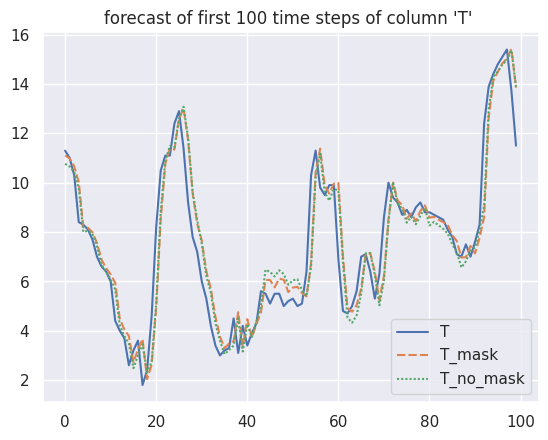

In [113]:
plot_ts(df_pred_air_mask,df_pred_air_no_mask, df_air_test, col = "T", time_steps= 100)